## NLTK 사용

In [1]:
import os
import librosa
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# 오디오 길이 가져오기
def get_audio_duration(file_path):
    y, sr = librosa.load(file_path)
    return librosa.get_duration(y=y, sr=sr)

# 텍스트 파일에서 토큰 수 세기
def count_total_tokens_nltk(file_path):
    total_tokens = 0
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            tokens = nltk.word_tokenize(line.strip())
            total_tokens += len(tokens)
    return total_tokens

# 비율계산
def calculate_text_ratio(text_tokens, audio_duration_sec):
    total_duration_min = audio_duration_sec / 60
    ratio = text_tokens / total_duration_min if total_duration_min > 0 else 0
    return ratio


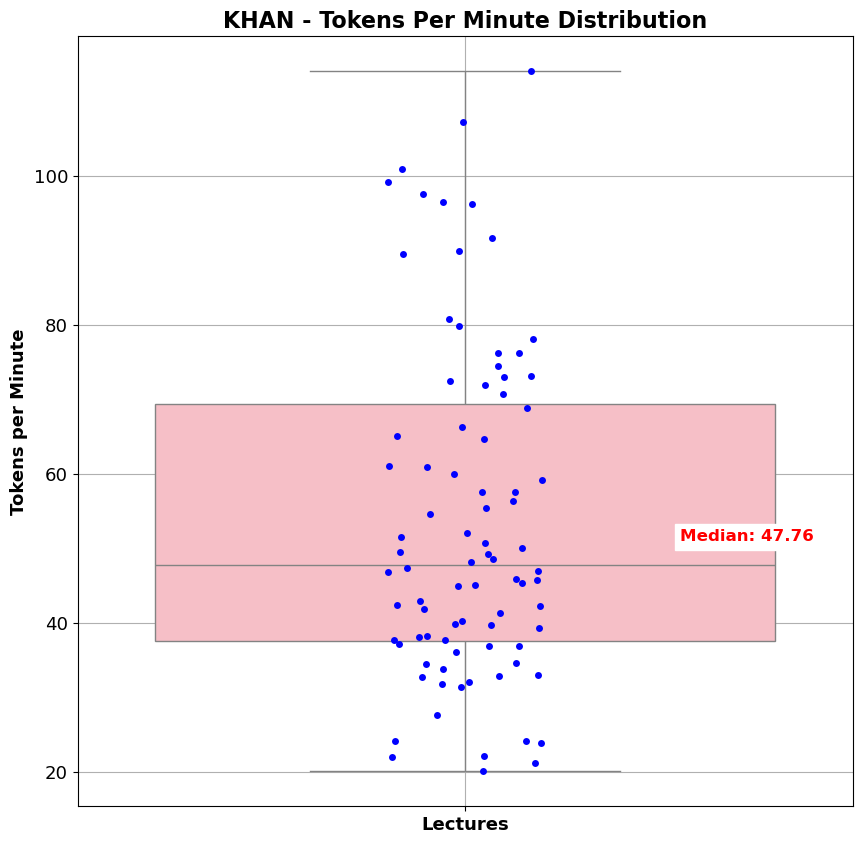

In [3]:
# 파일 처리 및 시각화화

def visualize_text_ratio():
    audio_folder = 'khan_audio'
    text_folder = 'khan_audio_txt_with_timestamp'
    
    audio_files = sorted([f for f in os.listdir(audio_folder) if f.endswith('.mp3')])
    text_files = sorted([f for f in os.listdir(text_folder) if f.endswith('.txt')])
    
    if len(audio_files) != len(text_files):
        raise ValueError("오디오 파일과 텍스트 파일의 수가 일치하지 않습니다.")
    
    text_ratios = []

    for audio_file, text_file in zip(audio_files, text_files):
        audio_path = os.path.join(audio_folder, audio_file)
        text_path = os.path.join(text_folder, text_file)
        
        duration_sec = get_audio_duration(audio_path)
        total_tokens = count_total_tokens_nltk(text_path)  # NLTK 토큰화를 사용합니다.
        ratio = calculate_text_ratio(total_tokens, duration_sec)
        
        text_ratios.append(ratio)

    # 박스플롯 및 스트립플롯 생성
    plt.figure(figsize=(10, 10))
    ax = sns.boxplot(data=text_ratios, orient='v', color='lightpink')
    sns.stripplot(data=text_ratios, orient='v', color='blue', jitter=True)

    # 중앙값 표시
    median = np.median(text_ratios)
    plt.text(0.95, 0.35, f'Median: {median:.2f}', color='red', ha='right', va='center', 
             fontweight='bold', fontsize=12, transform=ax.transAxes, backgroundcolor='white')

    plt.title('KHAN - Tokens Per Minute Distribution', fontsize=16, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Tokens per Minute', fontsize=13, fontweight='bold')

    plt.xticks([0], ['Lectures'], fontsize=13, fontweight='bold')
    plt.yticks(fontsize=13)

    plt.grid(True)
    plt.show()

# 예시 실행 (모든 데이터를 하나의 그래프로 시각화)
visualize_text_ratio()

## spaCy 사용

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydub import AudioSegment
import spacy

# spaCy 모델 로드
nlp = spacy.load('en_core_web_sm')


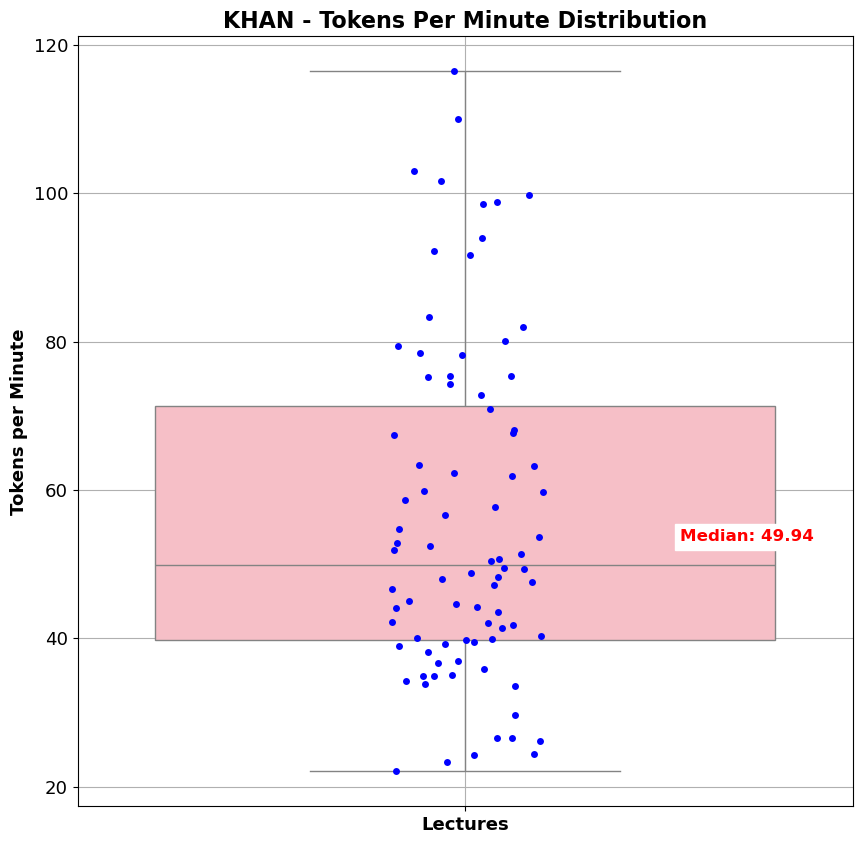

In [6]:
# 오디오 파일 길이 계산
def get_audio_duration(file_path):
    audio = AudioSegment.from_mp3(file_path)
    return len(audio) / 1000  # milliseconds to seconds

# 텍스트 파일에서 토큰 개수 반환 (spaCy 사용)
def count_total_tokens_spacy(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    doc = nlp(text)  # spaCy를 사용하여 텍스트 처리
    return len(doc)  # 토큰 개수를 반환

# 분당 토큰 개수 계산
def calculate_text_ratio(text_tokens, audio_duration_sec):
    total_duration_min = audio_duration_sec / 60
    ratio = text_tokens / total_duration_min if total_duration_min > 0 else 0
    return ratio

# 파일 처리 및 시각화
def visualize_text_ratio():
    audio_folder = 'khan_audio'
    text_folder = 'khan_audio_txt_with_timestamp'
    
    audio_files = sorted([f for f in os.listdir(audio_folder) if f.endswith('.mp3')])
    text_files = sorted([f for f in os.listdir(text_folder) if f.endswith('.txt')])
    
    if len(audio_files) != len(text_files):
        raise ValueError("오디오 파일과 텍스트 파일의 수가 일치하지 않습니다.")
    
    text_ratios = []

    for audio_file, text_file in zip(audio_files, text_files):
        audio_path = os.path.join(audio_folder, audio_file)
        text_path = os.path.join(text_folder, text_file)
        
        duration_sec = get_audio_duration(audio_path)
        total_tokens = count_total_tokens_spacy(text_path)  # spaCy 토큰화를 사용합니다.
        ratio = calculate_text_ratio(total_tokens, duration_sec)
        
        text_ratios.append(ratio)

    # 박스플롯 및 스트립플롯 생성
    plt.figure(figsize=(10, 10))
    ax = sns.boxplot(data=text_ratios, orient='v', color='lightpink')
    sns.stripplot(data=text_ratios, orient='v', color='blue', jitter=True)

    median = np.median(text_ratios)
    plt.text(0.95, 0.35, f'Median: {median:.2f}', color='red', ha='right', va='center', 
             fontweight='bold', fontsize=12, transform=ax.transAxes, backgroundcolor='white')

    plt.title('KHAN - Tokens Per Minute Distribution', fontsize=16, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Tokens per Minute', fontsize=13, fontweight='bold')

    plt.xticks([0], ['Lectures'], fontsize=13, fontweight='bold')
    plt.yticks(fontsize=13)

    plt.grid(True)
    plt.show()

# 예시 실행 (모든 데이터를 하나의 그래프로 시각화)
visualize_text_ratio()